## <font size=5> <strong>Heart Disease Prediction
 

## I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'Accuracy Scores.png', 'heart.csv', 'Heart_disease_prediction (1).ipynb']


## II. Importing and understanding our dataset 

In [2]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [5]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2,0
153,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


#### Description

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Let's understand our columns better:

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [10]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [11]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [12]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [13]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

1    165
0    138
Name: target, dtype: int64


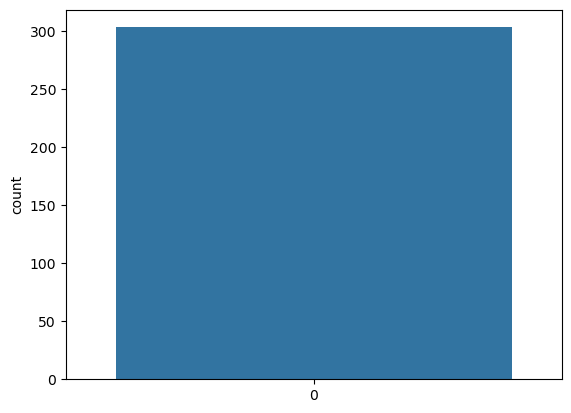

In [14]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

#Alternatively,
# print("Percentage of patience with heart problems: "+str(y.where(y==1).count()*100/303))
# print("Percentage of patience with heart problems: "+str(y.where(y==0).count()*100/303))

# #Or,
# countNoDisease = len(df[df.target == 0])
# countHaveDisease = len(df[df.target == 1])

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [16]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

##### We notice, that as expected, the 'sex' feature has 2 unique features

<Axes: xlabel='sex', ylabel='target'>

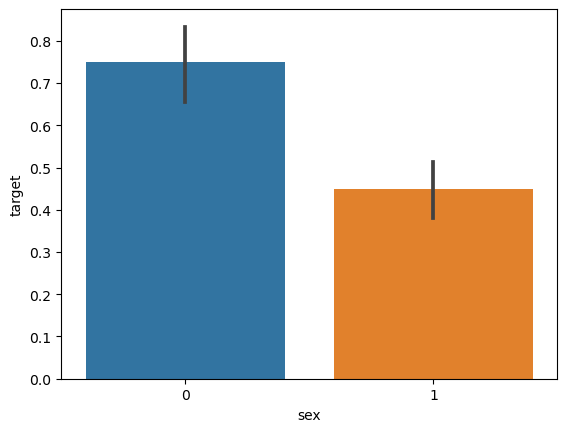

In [17]:
sns.barplot(x=dataset["sex"],y=y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [18]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<Axes: xlabel='cp', ylabel='target'>

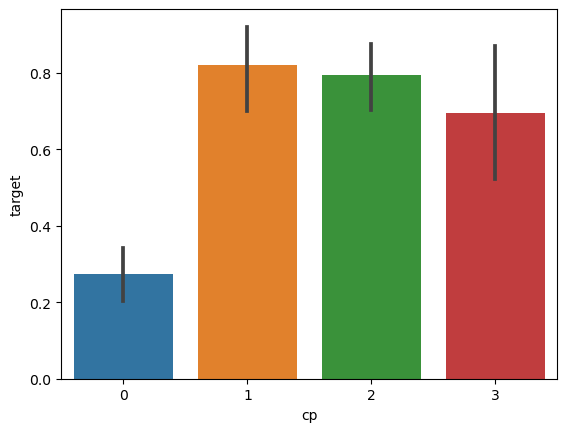

In [19]:
sns.barplot(x=dataset["cp"],y=y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [20]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<Axes: xlabel='fbs', ylabel='target'>

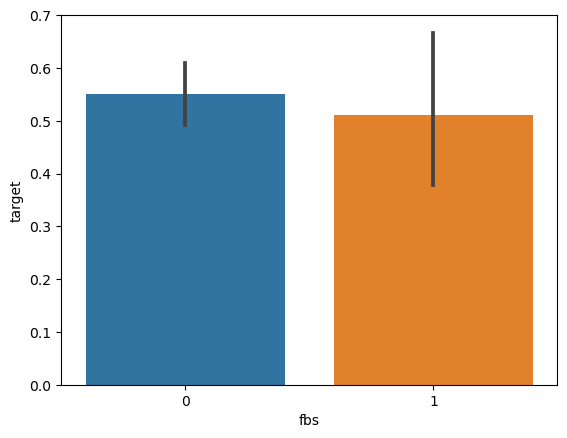

In [22]:
sns.barplot(x=dataset["fbs"],y=y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [23]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<Axes: xlabel='restecg', ylabel='target'>

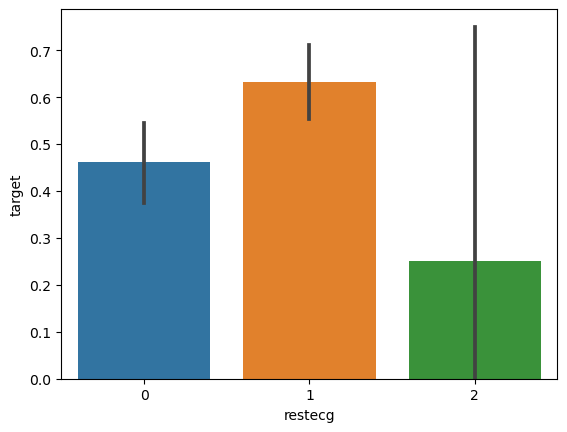

In [24]:
sns.barplot(x=dataset["restecg"],y=y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [25]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<Axes: xlabel='exang', ylabel='target'>

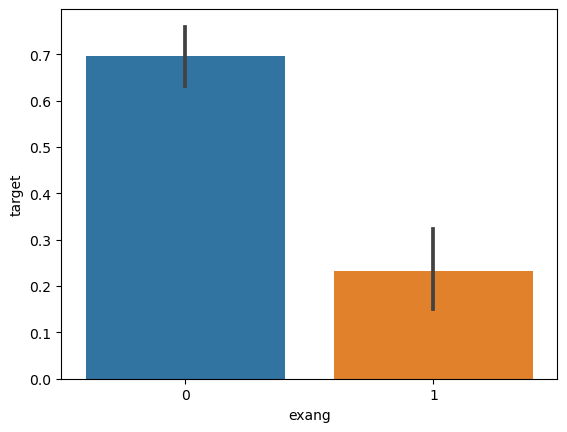

In [26]:
sns.barplot(x=dataset["exang"],y=y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [27]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<Axes: xlabel='slope', ylabel='target'>

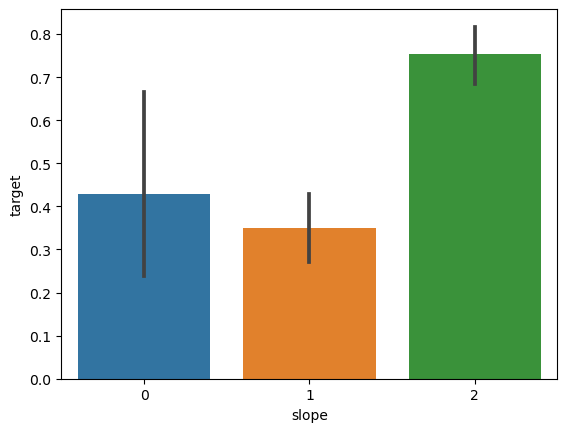

In [28]:
sns.barplot(x=dataset["slope"],y=y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [29]:
#number of major vessels (0-3) colored by flourosopy

In [30]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<Axes: ylabel='count'>

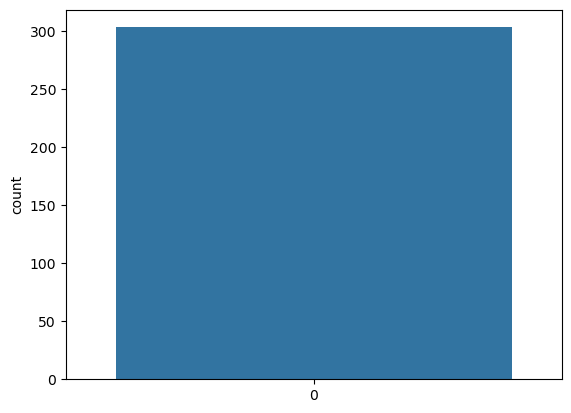

In [31]:
sns.countplot(dataset["ca"])

<Axes: xlabel='ca', ylabel='target'>

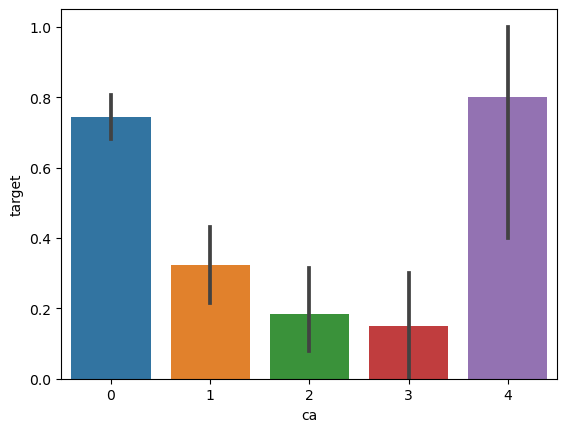

In [32]:
sns.barplot(x=dataset["ca"],y=y)

##### ca=4 has astonishingly large number of heart patients

In [33]:
### Analysing the 'thal' feature

In [34]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<Axes: xlabel='thal', ylabel='target'>

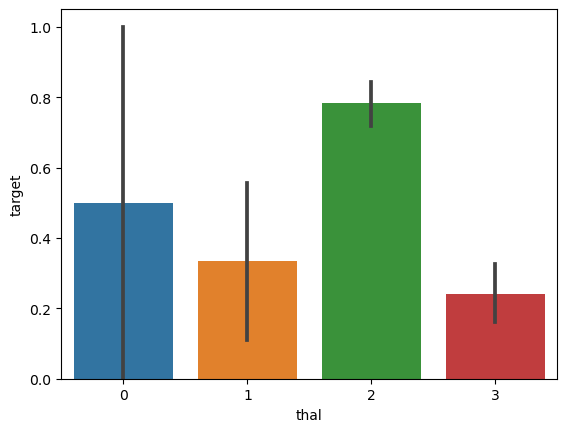

In [35]:
sns.barplot(x=dataset["thal"],y=y)

<Axes: xlabel='thal', ylabel='Density'>

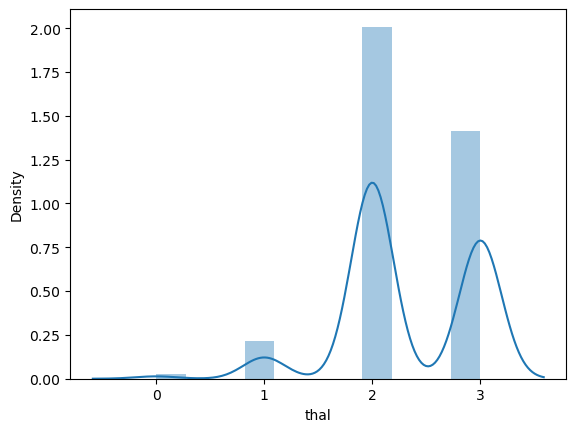

In [36]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [38]:
X_train.shape

(242, 13)

In [39]:
X_test.shape

(61, 13)

In [40]:
Y_train.shape

(242,)

In [41]:
Y_test.shape

(61,)

## V. Model Fitting

In [81]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, roc_curve

### Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [44]:
Y_pred_lr.shape

(61,)

In [93]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")
print("Recall:")
print(round(recall_score(Y_pred_lr,Y_test)*100,2))
print("Auc:")
print(round(roc_auc_score(Y_pred_lr,Y_test)*100,2))

The accuracy score achieved using Logistic Regression is: 85.25 %
Recall:
85.71
Auc:
85.16


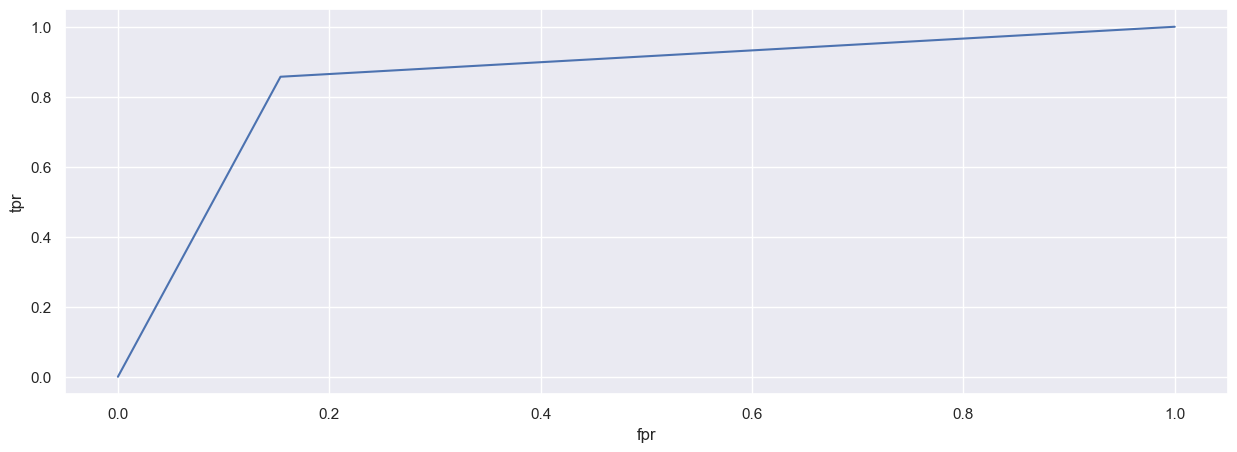

In [85]:
fpr_lr, tpr_lr, thresholds_lr=roc_curve(Y_pred_lr,Y_test)
auc=roc_auc_score(Y_pred_lr,Y_test)

plt.plot(fpr_lr, tpr_lr)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

### SVM

In [48]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [49]:
Y_pred_svm.shape

(61,)

In [94]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")
print("Recall:")
print(+round(accuracy_score(Y_pred_svm,Y_test)*100,2))
print("Auc:")
print(round(roc_auc_score(Y_pred_svm,Y_test)*100,2))

The accuracy score achieved using Linear SVM is: 81.97 %
Recall:
81.97
Auc:
82.21


### Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(200):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [55]:
Y_pred_rf.shape

(61,)

In [95]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")
print("Recall:")
print(+round(recall_score(Y_pred_rf,Y_test)*100,2))
print("Auc:")
print(round(roc_auc_score(Y_pred_rf,Y_test)*100,2))

The accuracy score achieved using Decision Tree is: 88.52 %
Recall:
90.91
Auc:
88.31


### XGBoost

In [58]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [59]:
Y_pred_xgb.shape

(61,)

In [96]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")
print("Recall:")
print(+round(recall_score(Y_pred_xgb,Y_test)*100,2))
print("Auc:")
print(round(roc_auc_score(Y_pred_xgb,Y_test)*100,2))

The accuracy score achieved using XGBoost is: 83.61 %
Recall:
85.29
Auc:
83.39


### Neural Network

In [57]:
!pip install keras

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [73]:
import tensorflow.keras.backend as K
K.set_floatx('float32')
import tensorflow as tf
tf.keras.backend.set_floatx("float64")
print(tf.keras.backend.floatx(), tf.constant(1.0))

float64 tf.Tensor(1.0, shape=(), dtype=float32)


In [74]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.7438 - recall: 1.0000
Epoch 2/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7272 - recall: 1.0000 
Epoch 3/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7094 - recall: 1.0000 
Epoch 4/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6988 - recall: 1.0000 
Epoch 5/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6829 - recall: 0.9974 
Epoch 6/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6788 - recall: 0.9951 
Epoch 7/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6807 - recall: 0.9934 
Epoch 8/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6559 - recall: 0.9888 
Epoch 9/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6622 - recall: 0.9983 
Epoch 10/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6515 - recall: 0.9974 
Epoch 11/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6617 - recall: 0.9814 
Epoch 12/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6786 - recall: 0.9805 
Epoch 13/300
8

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5859 - recall: 0.7504 
Epoch 72/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5736 - recall: 0.7756 
Epoch 73/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5873 - recall: 0.7923 
Epoch 74/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5679 - recall: 0.7831 
Epoch 75/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5856 - recall: 0.7840 
Epoch 76/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5670 - recall: 0.7852 
Epoch 77/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5616 - recall: 0.7555 
Epoch 78/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5671 - recall: 0.7726 
Epoch 79/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5678 - recall: 0.7917 
Epoch 80/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5755 - recall: 0.7591 
Epoch 81/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6003 - recall: 0.7655 
Epoch 82/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5872 - recall: 0.7589 
Epoch 83/300
8/8 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5191 - recall: 0.8285 
Epoch 141/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5327 - recall: 0.7854 
Epoch 142/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5310 - recall: 0.7982 
Epoch 143/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5350 - recall: 0.7942 
Epoch 144/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5309 - recall: 0.8105 
Epoch 145/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5473 - recall: 0.7588 
Epoch 146/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5270 - recall: 0.8336 
Epoch 147/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5658 - recall: 0.7419 
Epoch 148/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5168 - recall: 0.7940 
Epoch 149/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5351 - recall: 0.7526 
Epoch 150/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5058 - recall: 0.8117 
Epoch 151/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5330 - recall: 0.8057 
Epoch 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5054 - recall: 0.8147 
Epoch 210/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5056 - recall: 0.7709 
Epoch 211/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4839 - recall: 0.8615 
Epoch 212/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4825 - recall: 0.8265 
Epoch 213/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4940 - recall: 0.7884 
Epoch 214/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5036 - recall: 0.7708 
Epoch 215/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4937 - recall: 0.8195 
Epoch 216/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5194 - recall: 0.7932 
Epoch 217/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4945 - recall: 0.7952 
Epoch 218/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4952 - recall: 0.7827 
Epoch 219/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4801 - recall: 0.8239 
Epoch 220/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5027 - recall: 0.7735 
Epoch 

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4482 - recall: 0.8037 
Epoch 279/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4627 - recall: 0.8389 
Epoch 280/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4875 - recall: 0.8200 
Epoch 281/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4577 - recall: 0.8310 
Epoch 282/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4668 - recall: 0.7759 
Epoch 283/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4712 - recall: 0.8067 
Epoch 284/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4880 - recall: 0.7635 
Epoch 285/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5046 - recall: 0.7641 
Epoch 286/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4955 - recall: 0.7409 
Epoch 287/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4751 - recall: 0.8039 
Epoch 288/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4757 - recall: 0.8024 
Epoch 289/300
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4412 - recall: 0.8117 
Epoch 

In [75]:
Y_pred_nn = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [76]:
Y_pred_nn.shape

(61, 1)

In [77]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [97]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")
print("recall:")
print(+round(recall_score(Y_pred_svm,Y_test)*100,2))
print("Auc:")
print(round(roc_auc_score(Y_pred_nn,Y_test)*100,2))


The accuracy score achieved using Neural Network is: 73.77 %
recall:
81.08
Auc:
74.4


## VI. Output final score

In [69]:
scores = [score_lr,score_svm,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Support Vector Machine","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 83.61 %
The accuracy score achieved using Neural Network is: 70.49 %


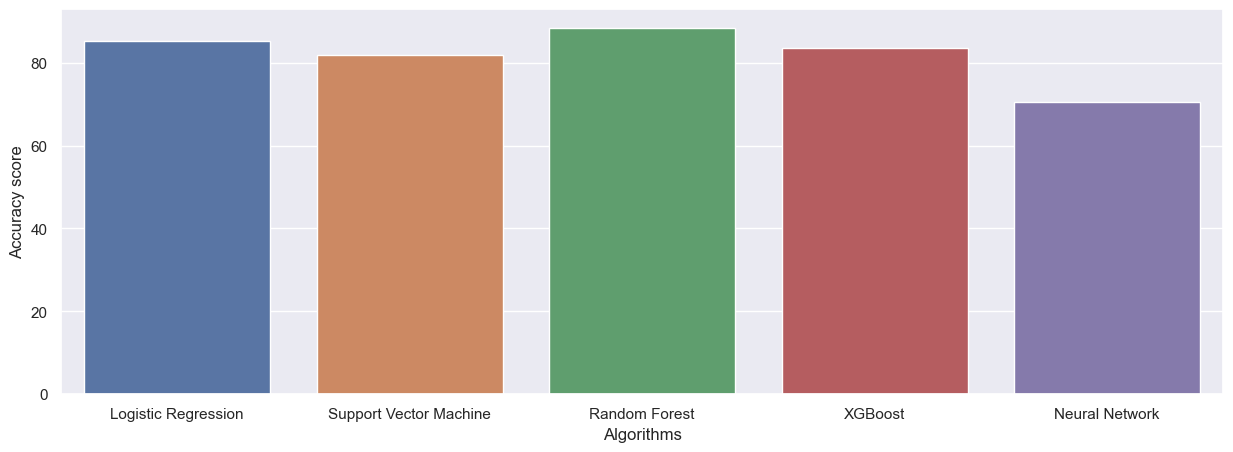

In [70]:
sns.set(rc={'figure.figsize':(15,5)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)
plt.savefig("Accuracy Scores")

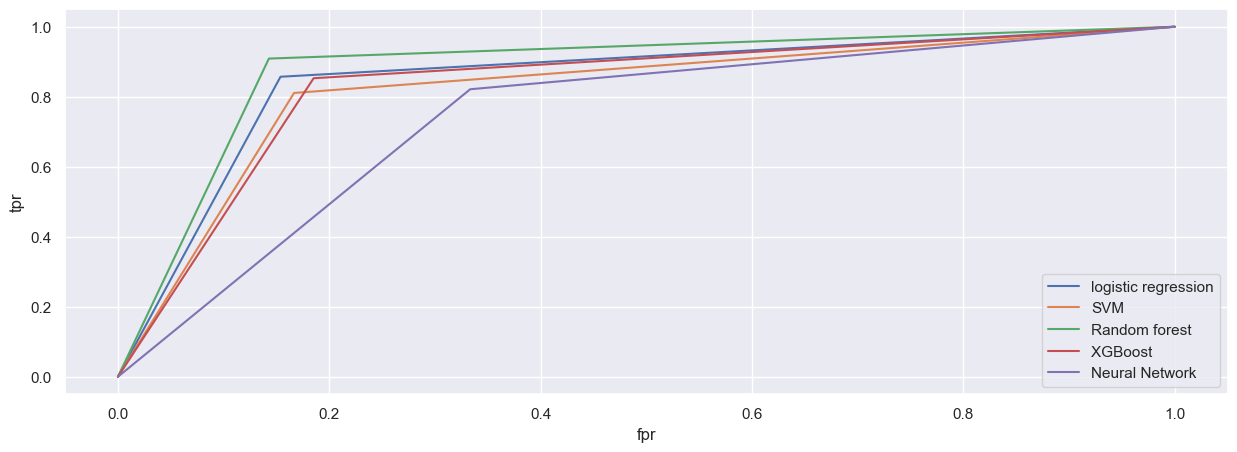

In [92]:
fpr_lr, tpr_lr, thresholds_lr=roc_curve(Y_pred_lr,Y_test)
fpr_rf, tpr_rf, thresholds_rf=roc_curve(Y_pred_rf,Y_test)
fpr_svm, tpr_svm, thresholds_svm=roc_curve(Y_pred_svm,Y_test)
fpr_xgb, tpr_xgb, thresholds_xgb=roc_curve(Y_pred_xgb,Y_test)
fpr_nn, tpr_nn, thresholds_nn=roc_curve(Y_pred_nn,Y_test)

plt.plot(fpr_lr, tpr_lr,label="logistic regression")
plt.plot(fpr_svm, tpr_svm, label="SVM")
plt.plot(fpr_rf, tpr_rf, label="Random forest")
plt.plot(fpr_xgb, tpr_xgb, label="XGBoost ")
plt.plot(fpr_nn, tpr_nn,label="Neural Network")

plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()